<a href="https://colab.research.google.com/github/margazadasha/Machine-learning-ML/blob/main/%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D0%B7%D0%B0_4_6%D0%A4%D0%86%D0%A2_%D0%9F%D0%A0%E2%84%9610_%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №10
Згорткові нейронні мережі.
#Завдання 1. Створити нейронну мережу (модель) з використанням згорткових шарів для датасета fashion mnist.

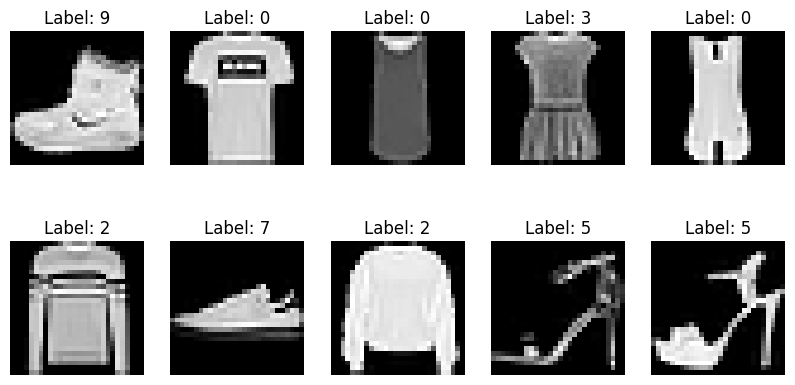

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

#Завантаження датасету fashion mnist.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Виведення перших 10 зображень.
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [8]:
#Нормалізація даних.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Зміна форми даних.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#Однократне кодування міток.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Архітектура моделі.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#Компіляція моделі.
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Використання колбеків.
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [11]:
#Навчання моделі.
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7021 - loss: 0.8320 - val_accuracy: 0.8623 - val_loss: 0.3749 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8448 - loss: 0.4344 - val_accuracy: 0.8783 - val_loss: 0.3270 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8669 - loss: 0.3649 - val_accuracy: 0.8967 - val_loss: 0.2861 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8828 - loss: 0.3243 - val_accuracy: 0.8978 - val_loss: 0.2744 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8902 - loss: 0.2995 - val_accuracy: 0.9037 - val_loss: 0.2605 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9017 - loss: 0.2750 - val_accuracy: 0.9072 - val_loss: 0.2570 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9065 - 

In [12]:
#Вивід summary.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

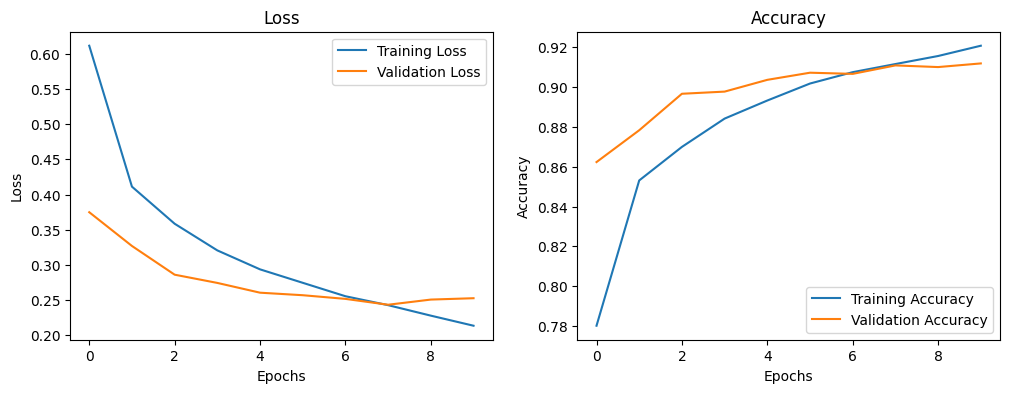

In [13]:
#Графік функції фтрат.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Графік функції точності.
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
from sklearn.metrics import classification_report

#Прогнози.
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#Класифікаційний звіт.
report = classification_report(y_test_classes, y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.85      0.87      0.86      1000
           3       0.91      0.91      0.91      1000
           4       0.89      0.81      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.72      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.91      0.91     10000



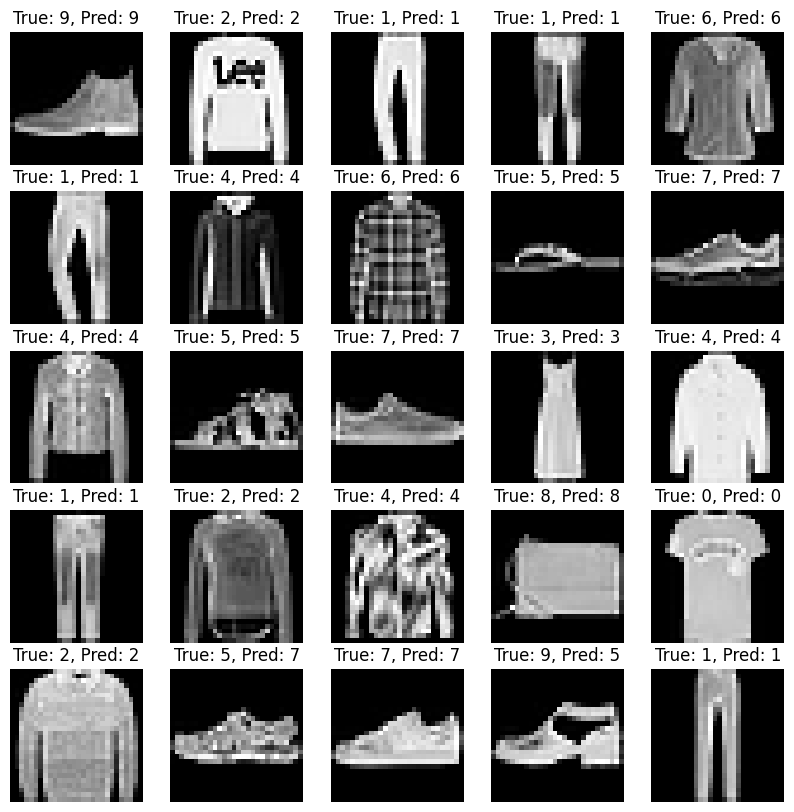

In [15]:
#Візуалізація зображень справжнього та прогнозованого класів.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test_classes[i]}, Pred: {y_pred_classes[i]}')
    plt.axis('off')
plt.show()

Висновок: В даному завданні було створено згорткову нейронну мережу для класифікації зображень із датасету Fashion MNIST. Розроблена модель включала кілька згорткових і pooling шарів, а також механізми регуляризації (Dropout) для зменшення перенавчання. Під час навчання використовувались колбеки для ранньої зупинки та зменшення швидкості навчання. Після тренування моделі було збудовано графіки втрат і точності, отримано класифікаційний звіт та проведено візуалізацію результатів розпізнавання справжнього та прогнозованого класів. Модель продемонструвала адекватну точність у вирішенні задачі класифікації зображень.